<a href="https://colab.research.google.com/github/felipemaiapolo/legalnlp/blob/main/demo/Doc2Vec/Doc2Vec_TUTORIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Doc2Vec

**Autores**:

- Kauê Capellato J. Parreira (kauecapellatojp@gmail.com)

# Introdução

Um dos grandes desafios de algoritmos de ciência da computação é a representação numérica de textos e documentos. Neste sentido, apresentamos uma breve explicação de um modelo que é visto como uma extensão do Word2Vec, previamente descrito, denominado **Doc2Vec** ou **Paragraph Vector** - Vetor de Parágrafos.

Tal modelo foi roposto por Tomas Mikolov e Quoc Le [[1]](https://arxiv.org/pdf/1405.4053.pdf), ambos funcionários do Google na época do desenvolvimento do mesmo, em 2014.

Para a apresentação da parte teórica, utilizamos como base as referências dadas em [[2]](https://medium.com/@amarbudhiraja/understanding-document-embeddings-of-doc2vec-bfe7237a26da), [[3]](https://aclanthology.org/W16-1609.pdf), [[4]](https://heartbeat.fritz.ai/getting-started-with-doc2vec-2645e3e9f137) e [[5]](http://dspace.unipampa.edu.br/bitstream/riu/1601/1/An%C3%A1lise%20de%20sentimento%20usando%20a%20representa%C3%A7%C3%A3o%20distribu%C3%ADda%20de%20par%C3%A1grafos%20para%20o%20portugu%C3%AAs.pdf).

##O que é o Doc2Vec e como funciona

Como dito acima, o Doc2Vec, também chamado de $\textit{Paragraph Vector}$ (Vetor de Paragráfos), pode ser visto como uma extensão do Word2Vec no sentido de, no caso do Word2Vec, cujo objetivo é a representação de palavras no espaço real d-dimensional ($R^d$, $\,$ $d \in \textbf{Z}^{+}$), ser utilizado para a representação de documentos no espaço d-dimensional.

O Vetor de Paragráfos é um algoritmo não supervisionado que aprende representações vetoriais diferentes para as palavras de variados textos. Apesar do seu nome, ele enfatiza o fato que podemos utilizá-lo para textos de diversos tamanhos, desde simples sentenças até enormes documentos.

Agora veremos brevemente a estrutura do Vetor de Parágrafos.

## Alguns detalhes da estrutura do Doc2Vec

O Doc2Vec possui duas variações: PV-DM e DBOW, possuindo algumas semelhanças com o Word2Vec. Explicaremos brevemente como essas variações funcionam abaixo. 

### PV-DM: Paragraph Vector - Distributed Memory

Essa abordagem se assemelha ao CBOW (Continuous Bag-Of-Words) do Word2Vec, uma vez que recebe como entrada as palavras de contexto (uma vizinhança da palavra $\textit{target}$) e retorna um vetor de probabilidades da palavra pertencer àquele contexto. Porém uma diferença se torna presente: a presença de uma matriz de paragráfos (representada por D na figura abaixo), realizando o mapeamento dos paragráfos para vetores distintos de palavras.

Assim, cada parágrafo é mapeado para um único vetor, que representa uma coluna em **D** e cada palavra também é mapeada para um único vetor, que representa cada coluna em **W**. Depois disso, é feita a média ou concatenação desses vetores para a predição da próxima palavra no contexto.



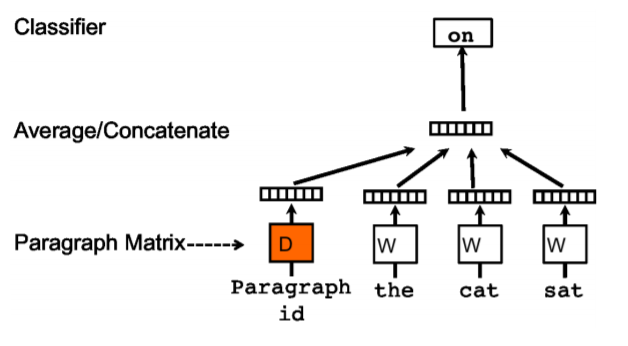

Fonte: Distributed Representations of Sentences and Documents [[1]](https://arxiv.org/pdf/1405.4053.pdf)


O token de parágrafos funciona memorizando o que está faltando do contexto e por isso o nome Distributed Memory.  

Após o treinamento, o Vetor de Parágrafos pode ser utilizado como *features* em modelos convencionais, como a Regressão Logística, CatBoost, Florestas Aleatórias, XGBoost, etc. 

Algumas vatangens dos Vetores de Parágrafos são o fato deles utilizarem dados não rotulados e fornecerem uma boa generalização para altas dimensões, preservando a semântica e a ordem das palavras. 


### PV-DBOW: Paragraph Vector - Distributed Bag-Of-Words

Essa abordagem, por sua vez, é semelhante ao Skip-Gram do Word2Vec, ou seja, no caso desse modelo, dado uma palavra, o objetivo é prever o contexto. No DBOW, é utilizado o Vetor de Paragráfos para prever as palavras de um determinado texto ou uma amostra desse texto.

E também pode ser visto como o modelo acima, sendo que os vetores de palavras **W** são ignorados durante o processo de treinamento e o modleo é forçado a prever palavras escolhidas aleatoriamente do parágrafo.



A imagem abaixo representa um esquema simplificado de como PV-DBOW atua.

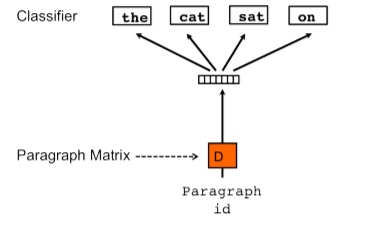

Fonte: Distributed Representations of Sentences and Documents [[1]](https://arxiv.org/pdf/1405.4053.pdf)


Como vantagem, essa abordagem requere menos armazenamento, sendo assim mais eficiente, uma vez que os vetores de palavras são ignorados.

#Mão na massa

Agora vamos ver uma aplicação do Doc2Vec em uma tarefa de classificação com um conjunto de dados de textos jurídicos com seus status: Ativo, Suspenso ou Arquivado. Comecemos com a parte brevemente descritiva e de pré-processamento dos dados. 

##Importando

Vamos importar as bibliotecas necessárias para a utilização do modelo.

##Importando

Vamos importar as bibliotecas necessárias para a utilização do modelo.

In [1]:
# inicializando a seed e importando algumas bibliotecas
random_seed=42

import numpy as np
import random
import os

os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(random_seed)
random.seed(random_seed)

In [2]:
from IPython.display import clear_output
!pip install ftfy
!pip install gensim=='3.8.3'
!pip install git+https://github.com/felipemaiapolo/legalnlp
clear_output()

In [3]:
import re
import ftfy
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from legalnlp.clean_functions import *

Célula de comando para fazer o download do modelo Doc2Vec pré-treinado.

In [4]:
from legalnlp.get_premodel import *
get_premodel('wodc')

True

Aqui vamos importar o conjunto de dados no qual iremos trabalhar neste tutorial:

In [5]:
data=pd.read_csv('https://raw.githubusercontent.com/felipemaiapolo/legalnlp/main/demo/data_base.csv')
data.drop(columns=['Unnamed: 0'],inplace=True)
data.dropna(inplace=True)

E uma breve visualização desses dados:

In [6]:
data.head()

,text,label
0,Início da Execução Juntado 0008003-11.2018.8.2...,H:Suspenso
1,Ofício Requisitório - Comunicação - Protocolo ...,H:Arquivado
2,Arquivado Provisoriamente aguardando manifestação,H:Suspenso
3,Petição Juntada Juntada a petição diversa - Ti...,H:Ativo
4,Remetidos os Autos para o Arquivo Geral – Devo...,H:Arquivado


Esse conjunto de dados possui 6449 observações e 2 variáveis.

Vamos ver agora se temos dados faltantes:

In [7]:
print("Quantidade de dados faltantes: ", data.isna().any().sum())

Quantidade de dados faltantes:  0


Isso é bom.Não temos nenhum dado faltante! Porém, vemos que os dados precisam ser limpos antes de serem aplicados no modelo, então vamos aplicar um função que limpa essas observações da coluna $text$.

Aplicamos então a função de limpeza na coluna $text$:

In [8]:
data['text'] = data['text'].apply(lambda x: clean(x))

E obtemos os dados agora limpos, vamos dar uma olhada:

In [9]:
str(data.loc[1,'text'])

'ofício requisitório - - comunicação - - protocolo eletrônico - - depre'

## Carregando o Modelo

Agora vamos carregar o modelo Doc2Vec pré-treinado, com abordagem PV-DBOW, de tamanho: $size = 100$ e tamanho de janela: $window\_size = 15$.

In [10]:
model = Doc2Vec.load('/content/W2V_D2V/w2v_d2v_dbow_size_100_window_15_epochs_20')

Com o modelo carregado, podemos utilizar alguns métodos fornecidos na documentação da biblioteca [Gensim](https://radimrehurek.com/gensim/models/doc2vec.html) para o Doc2Vec.

Com o modelo pré-treinado, podemos inferir novos vetores para novas senteças. 

In [11]:
model.infer_vector(["textos", "juridicos"])

array([-1.02972023e-01, -5.95197454e-02, -1.72594842e-02, -1.94663908e-02,
        9.34083611e-02,  1.83785520e-02, -2.00887895e-04,  1.55846300e-02,
        6.70540780e-02, -9.05366149e-03,  1.72428396e-02, -1.01450384e-01,
        3.50277051e-02,  1.02653921e-01,  1.19213201e-02, -4.90214676e-02,
       -9.18226375e-04, -2.06575338e-02,  9.45909545e-02, -3.54868248e-02,
       -9.31038558e-02,  1.06907442e-01, -1.03809223e-01,  1.32060153e-02,
        3.07776444e-02, -3.98866013e-02,  5.99447964e-03,  8.82619768e-02,
        4.33775038e-02,  1.27117753e-01, -2.82161739e-02,  1.18692413e-01,
       -6.38860697e-03, -9.67138633e-02, -1.15658104e-01, -4.19186950e-02,
       -4.83139120e-02, -9.99646038e-02, -1.33482506e-02,  3.54315415e-02,
       -3.66634019e-02, -5.56650199e-03,  3.58015262e-02, -9.06355958e-03,
       -2.17056330e-02,  8.93975049e-02, -1.80380180e-01, -1.34943679e-04,
        2.43847910e-02, -2.19723314e-01, -7.86395445e-02, -4.74808067e-02,
       -5.20892590e-02,  

In [12]:
model.wv.similar_by_word("banco")

[('brasil', 0.7986418008804321),
 ('banco_itaú', 0.6769572496414185),
 ('banco_mercantil', 0.6748969554901123),
 ('bradesco', 0.665328860282898),
 ('banrisul', 0.6483218669891357),
 ('banco_santander', 0.6408952474594116),
 ('santander', 0.6307247877120972),
 ('agência', 0.6243692636489868),
 ('bnb', 0.6186673641204834),
 ('caixa_econômica_federal', 0.604042112827301)]

##De textos para vetores

Primeiramente vamos transformar as $labels$ aplicando o LabelEncoder da biblioteca sklearn.

In [13]:
encoder = LabelEncoder()
data['encoded'] = encoder.fit_transform(encoder.fit_transform(data['label']))
data.loc[[0, 1, 5]]

,text,label,encoded
0,início da execução juntado [processo] - - cump...,H:Suspenso,2
1,ofício requisitório - - comunicação - - protoc...,H:Arquivado,0
5,petição juntada nº protocolo : wscb [numero] t...,H:Arquivado,0


Agora vamos inferir os textos para obter vetores.

In [14]:
from tqdm import tqdm

In [15]:
def vetor_inferido(texto):

  string = str(texto).split()

  model.random.seed(random_seed)
  inferido = model.infer_vector(string, steps = 100)
  
  vetores = np.array(inferido)

  return vetores

In [16]:
data['infered'] = data['text'].apply(lambda x: vetor_inferido(x))

In [17]:
data.head(5)

,text,label,encoded,infered
0,início da execução juntado [processo] - - cump...,H:Suspenso,2,"[0.5329853, -0.2142315, -0.2899691, 0.02618954..."
1,ofício requisitório - - comunicação - - protoc...,H:Arquivado,0,"[-0.15933484, -0.08907514, -0.18305558, 0.1381..."
2,arquivado provisoriamente aguardando manifestação,H:Suspenso,2,"[-0.5532484, -0.36607486, -0.009561139, -0.365..."
3,petição juntada juntada a petição diversa - - ...,H:Ativo,1,"[0.09778791, -0.039283425, -0.6004626, 0.77206..."
4,remetidos os autos para o arquivo geral – devo...,H:Arquivado,0,"[0.0835023, -0.5006131, 0.3084476, -0.13344207..."


In [18]:
for i in range(0, 100):
  data[str(i)] = np.vstack(data.loc[:, 'infered'])[:, i]

In [19]:
data.head(5)

,text,label,encoded,infered,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,início da execução juntado [processo] - - cump...,H:Suspenso,2,"[0.5329853, -0.2142315, -0.2899691, 0.02618954...",0.532985,-0.214232,-0.289969,0.026190,0.013572,-0.196332,-0.294166,0.316920,-0.073066,0.647796,-0.019984,0.166469,-0.052837,0.127092,0.138738,0.624871,-0.212583,0.128716,0.559313,-0.369558,-0.324574,0.103355,-0.846429,-0.022039,-0.309396,-0.337596,-0.532683,0.156634,-0.281624,0.276502,0.579703,0.134297,-0.094801,-0.124980,-0.006463,-0.272455,...,-0.085414,0.561978,-0.525397,-0.113511,0.323632,-0.246734,-0.406647,-0.031335,-0.299384,-0.243015,0.528134,0.137552,-0.188591,0.229598,-0.399916,-0.303836,0.012790,-0.025937,-0.184122,0.187710,0.247975,0.571080,0.319729,-0.474065,-0.247046,0.431491,-0.458826,0.045746,0.318039,-0.004533,-0.451858,0.160059,0.177015,-0.102706,0.525717,0.122923,0.080839,0.331786,-0.338346,-0.242470
1,ofício requisitório - - comunicação - - protoc...,H:Arquivado,0,"[-0.15933484, -0.08907514, -0.18305558, 0.1381...",-0.159335,-0.089075,-0.183056,0.138185,-0.200633,-0.506482,-0.376064,0.621333,0.341253,0.090672,0.306215,0.343802,0.877820,0.138235,0.361627,-0.035973,0.503152,0.129632,0.553441,-0.040759,0.094660,-0.103016,-0.894792,0.221628,-0.097653,-0.040896,-0.584470,0.566814,0.267602,0.198697,0.016036,0.080350,-0.335044,-0.414570,-0.221512,-0.470016,...,0.056981,0.035965,-0.388830,-0.084908,-0.349497,-0.333756,-0.125259,-0.499263,-0.806706,0.088509,0.151857,-0.383267,-0.308759,0.514257,-0.474729,-0.325156,-0.121262,-0.209000,-0.430604,0.341827,0.067285,0.689582,0.289476,0.119285,-0.045252,0.153204,-0.475915,0.302366,-0.298365,-0.063062,-0.212644,0.334050,-0.635099,-0.405267,0.375374,-0.167851,-0.002315,0.189546,0.191784,-0.651744
2,arquivado provisoriamente aguardando manifestação,H:Suspenso,2,"[-0.5532484, -0.36607486, -0.009561139, -0.365...",-0.553248,-0.366075,-0.009561,-0.365169,0.460848,0.350056,-0.337601,0.263299,0.168510,0.059355,-0.048864,-0.294113,0.132204,-0.169982,0.004721,0.486992,-0.710635,0.281133,0.849577,0.036075,-0.075013,0.149315,-0.543300,0.036119,0.300023,-0.097224,-0.164250,-0.379353,0.209678,0.113483,0.109877,-0.009103,-0.402544,0.083118,0.019629,0.279113,...,0.055783,-0.057145,-0.475634,-0.201704,0.190484,-0.204471,-0.432122,0.002352,-0.522005,-0.156873,0.184528,-0.133935,-0.199852,-0.566975,-0.403281,0.249315,-0.201757,-0.130112,-0.564703,0.019431,-0.271427,0.455236,0.411339,-0.001067,-0.153460,0.019169,-0.322390,0.156827,-0.245665,-0.370132,-0.378009,-0.428117,-0.635049,-0.195031,0.529525,0.294696,0.224313,-0.020132,-0.048125,-0.530780
3,petição juntada juntada a petição diversa - - ...,H:Ativo,1,"[0.09778791, -0.039283425, -0.6004626, 0.77206...",0.097788,-0.039283,-0.600463,0.772062,-1.100557,-0.303031,-0.137290,0.309423,-0.671915,-0.037564,0.463078,0.749412,0.423439,1.188296,0.713856,-0.634132,0.754605,0.795088,1.076325,0.050491,0.201788,0.250349,-0.898026,0.325202,-0.352764,0.184551,-0.941779,0.313451,-0.009166,0.757787,-0.066989,0.203134,-0.850390,-0.015378,-0.205189,0.360188,...,0.198082,-0.381527,-0.068735,-0.501531,-0.709516,-0.209095,-0.345700,0.466041,-0.138123,-0.842163,0.572853,0.578709,-0.270333,0.709391,0.157558,0.535642,-0.427529,-0.140861,-0.367525,-0.137957,-0.350020,1.134231,0.508811,0.326026,0.159935,-0.015867,0.060399,-0.411412,-0.498382,-0.126485,-0.151928,0.016644,0.231261,-0.280516,0.209994,-0.145381,0.178754,0.147169,0.086704,-1.466494
4,remetidos os autos para o arquivo geral – devo...,H:Arquivado,0,"[0.0835023, -0.5006131, 0.3084476, -0.13344207...",0.083502,-0.500613,0.308448,-0.133442,0.418327,0.211141,0.198986,0.429728,-0.081569,-0.414527,0.338621,-0.191457,0.009202,0.363035,0.048603,0.462019,-0.231924,0.484561,0.313172,-0.245142,-0.027735,0.719832,-0.840125,0.293664,0.040888,0.055972,0.340515

### Dados de Treino e Teste

In [20]:
X_train, X_test, y_train, y_test = train_test_split( data.drop(columns = ['encoded', 'text', 'label', 'infered']), data['encoded'], random_state = random_seed, test_size = 0.3)

In [21]:
# Tamanhos dos x e y de treino e teste
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4514, 100)
(1935, 100)
(4514,)
(1935,)


#Classificação


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
def bootstrap(X_test, y_test, model, nn=False, B=250):

    #Criando um dicionário para armezenar os resultados
    out={}
    out['accuracy']=[]
    out['macro avg']={}
    out['macro avg']['f1-score']=[]
    out['macro avg']['recall']=[]
    out['macro avg']['precision']=[]
    out['weighted avg']={}
    out['weighted avg']['f1-score']=[]
    out['weighted avg']['recall']=[]
    out['weighted avg']['precision']=[]

    #Aplicando Bootstrap nos dados de teste
    for b in tqdm(range(B)):
        ind = np.random.choice(range(y_test.shape[0]),y_test.shape[0])
        X_test_boot, y_test_boot = X_test[ind,:], y_test[ind]

        y_pred=model.predict(X_test_boot)
        
        if nn:
            y_pred=np.argmax(y_pred,axis=1)
            report=classification_report(y_test_boot, y_pred, labels=[0, 1, 2], output_dict=True)
        else:
            report=classification_report(y_test_boot, y_pred, labels=[0, 1, 2], output_dict=True)

        out['accuracy'].append(report['accuracy'])
        out['macro avg']['f1-score'].append(report['macro avg']['f1-score'])
        out['macro avg']['recall'].append(report['macro avg']['recall'])
        out['macro avg']['precision'].append(report['macro avg']['precision'])
        out['weighted avg']['f1-score'].append(report['weighted avg']['f1-score'])
        out['weighted avg']['recall'].append(report['weighted avg']['recall'])
        out['weighted avg']['precision'].append(report['weighted avg']['precision'])

    #Preparando a saída
    y_pred=model.predict(X_test)
    
    if nn:
        y_pred=np.argmax(y_pred,axis=1)
        report=classification_report(y_test, y_pred, labels=[0, 1, 2], output_dict=True)
    else:
        report=classification_report(y_test, y_pred, labels=[0, 1, 2], output_dict=True)

    out['accuracy'] = [report['accuracy'], np.std(out['accuracy'])]
    out['macro avg']['f1-score'] = [report['macro avg']['f1-score'], np.std(out['macro avg']['f1-score'])] 
    out['macro avg']['recall'] = [report['macro avg']['recall'], np.std(out['macro avg']['recall'])] 
    out['macro avg']['precision'] = [report['macro avg']['precision'], np.std(out['macro avg']['precision'])] 
    out['weighted avg']['f1-score'] = [report['weighted avg']['f1-score'], np.std(out['weighted avg']['f1-score'])] 
    out['weighted avg']['recall'] = [report['weighted avg']['recall'], np.std(out['weighted avg']['recall'])] 
    out['weighted avg']['precision'] = [report['weighted avg']['precision'], np.std(out['weighted avg']['precision'])]
    
    return out

##CatBoost - Categorical Boost

Aqui vamos aplicar um modelo chamado CatBoost (Categorical Boosting), que é um modelo de aprendizado por comitê (ensemble learning).

In [24]:
!pip install catboost
clear_output()

In [25]:
# Importando o CatBoostClassifier 
from catboost import CatBoostClassifier

In [26]:
# creating validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, stratify = y_train, random_state = random_seed)

In [27]:
tunned_model = CatBoostClassifier(
    loss_function = 'MultiClass',
    random_seed=random_seed,
)

tunned_model.fit(
    X_train, y_train,
    verbose=500,
    eval_set=(X_val, y_val),
    early_stopping_rounds = 100
)

Learning rate set to 0.111046
0:	learn: 0.9921174	test: 0.9914200	best: 0.9914200 (0)	total: 144ms	remaining: 2m 24s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.3890034271
bestIteration = 260

Shrink model to first 261 iterations.


In [28]:
y_cat_pred = tunned_model.predict(X_test)

In [29]:
print("A acurácia do modelo é de: ", accuracy_score(y_test, y_cat_pred))

A acurácia do modelo é de:  0.8532299741602067


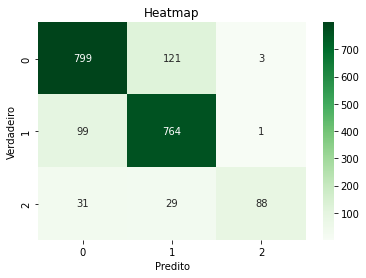

In [30]:
cm = confusion_matrix(y_test, y_cat_pred)
sns.heatmap(cm, annot = True, cmap = 'Greens', fmt = '.3g')
plt.title("Heatmap")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()

In [31]:
print(classification_report(y_test, y_cat_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       923
           1       0.84      0.88      0.86       864
           2       0.96      0.59      0.73       148

    accuracy                           0.85      1935
   macro avg       0.88      0.78      0.82      1935
weighted avg       0.86      0.85      0.85      1935



In [32]:
report_boot=bootstrap(np.array(X_test), np.array(y_test), tunned_model)

for i in ['accuracy', 'macro avg', 'weighted avg']:
 if i == 'accuracy':
     print("\n\n{:27}: {:.2f} ± {:.2f}".format(i, report_boot[i][0], report_boot[i][1]))
 for j in ['f1-score', 'recall', 'precision']:
   if i != 'accuracy':
     print("{:15}  {:10}: {:.2f} ± {:.2f}".format(i, j, report_boot[i][j][0], report_boot[i][j][1]))

100%|██████████| 250/250 [00:03<00:00, 62.78it/s]



accuracy                   : 0.85 ± 0.01
macro avg        f1-score  : 0.82 ± 0.01
macro avg        recall    : 0.78 ± 0.01
macro avg        precision : 0.88 ± 0.01
weighted avg     f1-score  : 0.85 ± 0.01
weighted avg     recall    : 0.85 ± 0.01
weighted avg     precision : 0.86 ± 0.01


#Referências

[1] Mikolov, T., Le, Quoc (2014).  Distributed Representations of Sentences and Documents. arXiv:1405.4053v2. \\


[2] Amar Budhiraja (2018) https://medium.com/@amarbudhiraja/understanding-document-embeddings-of-doc2vec-bfe7237a26da. Acesso em: 04/08/2021. \\

[3] Lau H. J., Baldwin T. An Empirical Evaluation of doc2vec with
Practical Insights into Document Embedding Generation. aclanthology: W16-1609. \\

[4] Abhinav Roy (2020) https://heartbeat.fritz.ai/getting-started-with-doc2vec-2645e3e9f137. Acesso em: 04/04/2021. \\

[5] Araujo S. Filipe. Análise de Sentimento usando a Representação
Distribuída de Parágrafos para o Português. Universidade Federal do Pampa.
